<a href="https://colab.research.google.com/github/vargasa/Notes/blob/master/CSC530/Project0_DataViz_DC311Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from six.moves import urllib

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

# Dataset from: http://opendata.dc.gov/datasets/2a46f1f1aad04940b83e75e744eb3b09_9
CSV_FILE = "https://opendata.arcgis.com/datasets/2a46f1f1aad04940b83e75e744eb3b09_9.csv"
fileName = "./dc_data.csv"

if not os.path.exists(fileName):
    urllib.request.urlretrieve(CSV_FILE,fileName)

df = pd.read_csv(fileName,parse_dates=["ADDDATE","RESOLUTIONDATE","SERVICEORDERDATE","SERVICEDUEDATE"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 30 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null datetime64[ns]
RESOLUTIONDATE                280349 non-null datetime64[ns]
SERVICEDUEDATE                333096 non-null datetime64[ns]
SERVICEORDERDATE              333105 non-null datetime64[ns]
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null object
INSPECTORNAME                 0 non-null float64
SERVICEORDERSTATUS            333105 non-null object
STATUS_CODE   

,Weekday,Hour
0,1,8
1,1,9
2,1,7
3,1,8
4,1,8


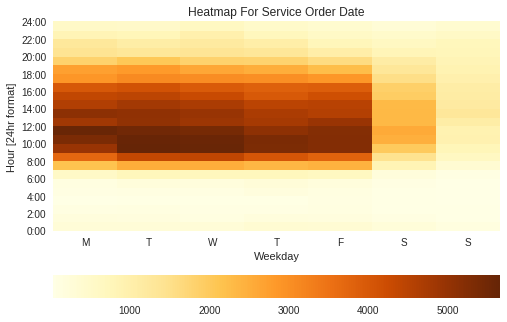

In [0]:
hmdf = pd.DataFrame()
df2 = df#[df["ORGANIZATIONACRONYM"] == "DH"]
hmdf["Weekday"] = df2["ADDDATE"].dt.weekday
hmdf["Hour"] = df2["ADDDATE"].dt.hour
display(hmdf.head())

fig, ax = plt.subplots()

hist, xbins, ybins, im = ax.hist2d(x=hmdf["Weekday"],y=hmdf["Hour"], cmap=plt.cm.YlOrBr, bins=[[i for i in range(8)],[i for i in range(25)]])
fig.colorbar(im,ax=ax,orientation="horizontal")
plt.xlabel("Weekday")
plt.ylabel("Hour [24hr format]")
plt.title("Heatmap For Service Order Date")
plt.xticks([i+0.5 for i in range(0,7)], ('M', 'T', 'W', 'T', 'F','S','S'))
plt.yticks([i*2 for i in range(0,13)], [str(i*2)+":00" for i in range(0,13)])
plt.show()

STATUS_CODE,CLOSED,OPEN
ORGANIZATIONACRONYM,,
DDOT,55812,46453
DPW,205929,5442


(2, 2)


Text(0.5, 1.0, 'Request status per organization')

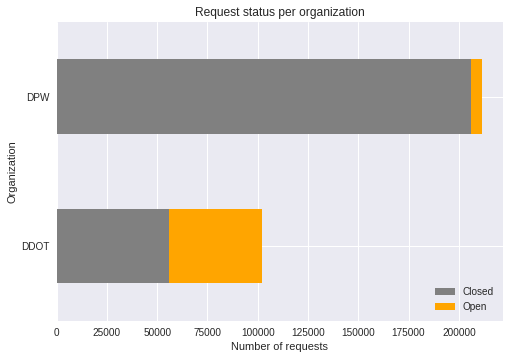

In [0]:
df2 = df[
    (df["ORGANIZATIONACRONYM"] == 'DPW')
    |
    (df["ORGANIZATIONACRONYM"] == "DDOT")
    ].groupby(by=["ORGANIZATIONACRONYM","STATUS_CODE"])["STATUS_CODE"].count().unstack("STATUS_CODE")
display(df2)

print(df2.shape)
df2.plot(kind="barh",stacked=True, color=["gray","orange"], label="Request Status")

legend=plt.legend()
legend.get_texts()[0].set_text('Closed')
legend.get_texts()[1].set_text('Open')

plt.ylabel("Organization")
plt.xlabel("Number of requests")
plt.title("Request status per organization")

ORGANIZATIONACRONYM  STATUS_CODE
DC-ICH               CLOSED              2
                     OPEN               19
DDOT                 CLOSED          55812
                     OPEN            46453
DDS                  OPEN                4
DMV                  CLOSED           6882
                     OPEN                4
DOEE                 CLOSED            460
                     OPEN              183
DOH                  CLOSED           5811
                     OPEN              136
DPW                  CLOSED         205929
                     OPEN             5442
FEMS                 CLOSED           1723
                     OPEN              105
ORM                  CLOSED            246
                     OPEN               69
OUC                  CLOSED           3484
                     OPEN              340
Name: ORGANIZATIONACRONYM, dtype: int64

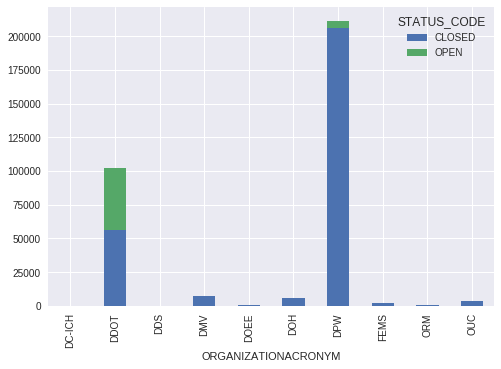

In [0]:
df2 = df.groupby(by=["ORGANIZATIONACRONYM","STATUS_CODE"])["ORGANIZATIONACRONYM"]
df2 = df2.count()
display(df2)
df2 = df2.unstack('STATUS_CODE')
df2.plot(kind="bar",stacked=True,logy=False)
plt.show()

STATUS_CODE,CLOSED,OPEN
SERVICECODEDESCRIPTION,,
Parking Meter Repair,26751.0,14027.0
Roadway Signs,1595.0,9923.0
Streetlight Repair Investigation,7152.0,4574.0
Sidewalk Repair,1141.0,3190.0
Pothole,8230.0,2639.0
Tree Pruning,1552.0,1846.0
Roadway Repair,54.0,1846.0
Tree Inspection,3815.0,1692.0
Tree Planting,741.0,1398.0


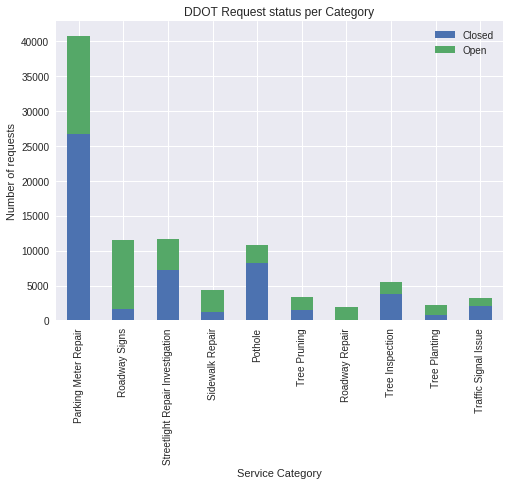

In [0]:
df2 = df[
    df["ORGANIZATIONACRONYM"] == "DDOT"
].groupby(["SERVICECODEDESCRIPTION","STATUS_CODE"])

df2 = df2["SERVICECODEDESCRIPTION"].count()
#display(df2)
df2 = df2.unstack('STATUS_CODE')

df2 = df2.sort_values(by="OPEN",ascending=False).dropna()
display(df2)
df2.head(10).plot(kind="bar",stacked=True,logy=False)

plt.xlabel("Service Category")
plt.ylabel("Number of requests")
plt.title("DDOT Request status per Category")

legend=plt.legend()
legend.get_texts()[0].set_text('Closed')
legend.get_texts()[1].set_text('Open')

,ADDDATE,ADDDATE_AUX,STATUS_CODE
78,2018-01-01 14:28:15,0 days 14:28:15,OPEN
441,2018-01-02 12:27:29,1 days 12:27:29,OPEN
269,2018-01-02 13:34:43,1 days 13:34:43,OPEN
488,2018-01-02 14:23:42,1 days 14:23:42,OPEN
3053,2018-01-03 12:36:44,2 days 12:36:44,OPEN


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


Text(0, 0.5, 'Number of requests')

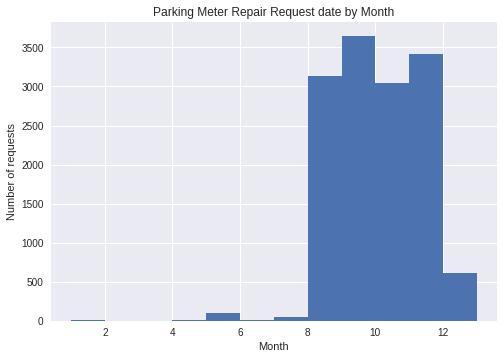

In [0]:
df['ADDDATE_AUX'] = df['ADDDATE'] - pd.to_datetime('2018-01-01', format='%Y-%m-%d') #Days from january 1st
df2 = df[
    (df['SERVICECODEDESCRIPTION'] == 'Parking Meter Repair' )
    &
    (df['STATUS_CODE'] == 'OPEN' )
    &
    (df['ORGANIZATIONACRONYM'] == 'DDOT')
].sort_values(by="ADDDATE")[['ADDDATE','ADDDATE_AUX',"STATUS_CODE"]]

display(df2.head())

df2 = (df2["ADDDATE_AUX"])/pd.Timedelta(days=30) #Months

bins=[i for i in range(1,14)]
print(bins)
df2.plot(kind='hist',logy=False,bins = bins)

plt.title("Parking Meter Repair Request date by Month")
plt.xlabel("Month")
plt.ylabel("Number of requests")

,ADDDATE,_AUX,STATUS_CODE
43,2018-01-01 13:14:20,0 days 13:14:20,OPEN
460,2018-01-02 13:23:15,1 days 13:23:15,OPEN
471,2018-01-02 13:27:59,1 days 13:27:59,OPEN
491,2018-01-02 13:32:07,1 days 13:32:07,OPEN
486,2018-01-02 13:49:04,1 days 13:49:04,OPEN


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


Text(0, 0.5, 'Number of requests')

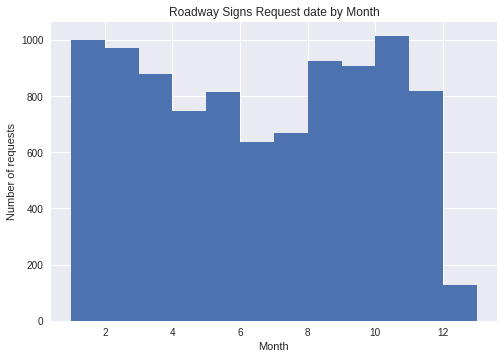

In [0]:
df['_AUX'] = df['ADDDATE'] - pd.to_datetime('2018-01-01', format='%Y-%m-%d') #Days from january 1st
df2 = df[
    (df['SERVICECODEDESCRIPTION'] == 'Roadway Signs' )
    &
    (df['STATUS_CODE'] == 'OPEN' )
    &
    (df['ORGANIZATIONACRONYM'] == 'DDOT')
].sort_values(by="ADDDATE")[['ADDDATE','_AUX',"STATUS_CODE"]]

display(df2.head())

df2 = (df2["_AUX"])/pd.Timedelta(days=30) #Months

bins=[i for i in range(1,14)]
print(bins)
df2.plot(kind='hist',logy=False,bins = bins)

plt.title("Roadway Signs Request date by Month")
plt.xlabel("Month")
plt.ylabel("Number of requests")

,ADDDATE,_AUX,SERVICEDUEDATE,STATUS_CODE
3053,2018-01-03 12:36:44,6 days 23:59:16,2018-01-10 12:36:00,OPEN
488,2018-01-02 14:23:42,6 days 23:59:18,2018-01-09 14:23:00,OPEN
269,2018-01-02 13:34:43,6 days 23:59:17,2018-01-09 13:34:00,OPEN
441,2018-01-02 12:27:29,6 days 23:59:31,2018-01-09 12:27:00,OPEN
78,2018-01-01 14:28:15,7 days 03:31:45,2018-01-08 18:00:00,OPEN


4 days 07:59:12
10 days 00:00:00


332368    7.978970
332386    7.814016
332491    7.866516
332488    7.882593
332480    7.910637
Name: _AUX, dtype: float64

SHAPE (14027,)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


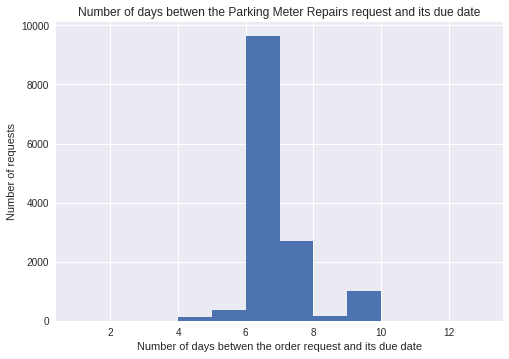

In [0]:
df['_AUX'] = df["SERVICEDUEDATE"]- df['ADDDATE']
df2 = df[
    (df['SERVICECODEDESCRIPTION'] == 'Parking Meter Repair' )
    &
    (df['STATUS_CODE'] == 'OPEN' )
    & 
    (df["SERVICEDUEDATE"] < pd.to_datetime('2019-01-19', format='%Y-%m-%d'))
].sort_values(by="SERVICEDUEDATE",ascending=False)[['ADDDATE',"_AUX","SERVICEDUEDATE","STATUS_CODE",]]

display(df2.tail(5))

print(df2["_AUX"].min())
print(df2["_AUX"].max())


df2 = (df2["_AUX"])/pd.Timedelta(days=1)

display(df2.head(5))

print("SHAPE", df2.shape)
bins=[i for i in range(1,14)]
print(bins)
df2.plot(kind='hist',logy=False,bins = bins)

plt.title("Number of days betwen the Parking Meter Repairs request and its due date")
plt.xlabel("Number of days betwen the order request and its due date")
plt.ylabel("Number of requests")

plt.show()

,ADDDATE,_AUX,SERVICEDUEDATE,STATUS_CODE
486,2018-01-02 13:49:04,183 days 22:59:56,2018-07-05 12:49:00,OPEN
491,2018-01-02 13:32:07,183 days 22:59:53,2018-07-05 12:32:00,OPEN
471,2018-01-02 13:27:59,183 days 22:59:01,2018-07-05 12:27:00,OPEN
460,2018-01-02 13:23:15,183 days 22:59:45,2018-07-05 12:23:00,OPEN
43,2018-01-01 13:14:20,183 days 02:45:40,2018-07-03 16:00:00,OPEN


182 days 06:59:11
189 days 01:00:00
MIN: 182.29109953703704
MAX: 189.04166666666666


181369    185.375231
181320    185.409653
181235    185.834248
180975    185.785255
180967    185.830613
Name: _AUX, dtype: float64

SHAPE (5239,)
[180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191]


Text(0, 0.5, 'Number of requests')

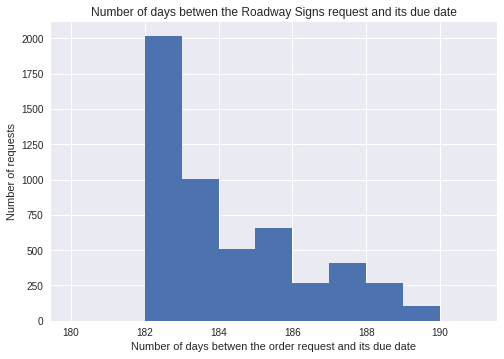

In [0]:
df['_AUX'] = df["SERVICEDUEDATE"]- df['ADDDATE']
df2 = df[
    (df['SERVICECODEDESCRIPTION'] == 'Roadway Signs' )
    &
    (df['STATUS_CODE'] == 'OPEN' )
    & 
    (df["SERVICEDUEDATE"] < pd.to_datetime('2019-01-19', format='%Y-%m-%d'))
].sort_values(by="SERVICEDUEDATE",ascending=False)[['ADDDATE',"_AUX","SERVICEDUEDATE","STATUS_CODE",]]

display(df2.tail(5))

print(df2["_AUX"].min())
print(df2["_AUX"].max())

df2 = (df2["_AUX"])/pd.Timedelta(days=1)

print("MIN:",df2.min())
print("MAX:",df2.max())

display(df2.head(5))

print("SHAPE", df2.shape)
bins=[i for i in range(180,192)]
print(bins)
df2.plot(kind='hist',logy=False,bins = bins)

plt.title("Number of days betwen the Roadway Signs request and its due date")
plt.xlabel("Number of days betwen the order request and its due date")
plt.ylabel("Number of requests")

ORGANIZATIONACRONYM              
DDOT                 Met due date     45314
                     fallShort        10496
DPW                  Met due date    185260
                     fallShort        20663
Name: _AUX, dtype: int64

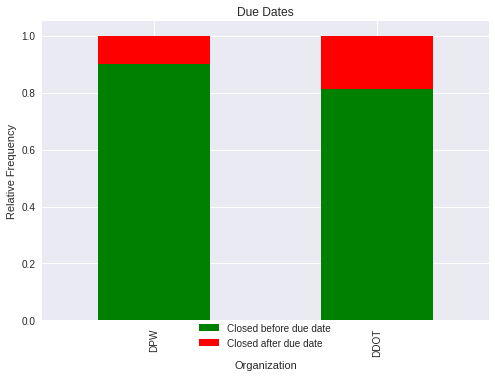

In [0]:
import numpy as np

df['_AUX'] = df["SERVICEDUEDATE"]- df['RESOLUTIONDATE']

df2 = df[
    (df["STATUS_CODE"] == "CLOSED")
    &
    ((df["ORGANIZATIONACRONYM"] == "DPW")
     |
    (df['ORGANIZATIONACRONYM'] == "DDOT"))
    ].sort_values(by="_AUX",ascending=True)[['ORGANIZATIONACRONYM',"_AUX"]]

df2["_AUX"] = (df2["_AUX"])/pd.Timedelta(days=1)

myGroups = np.where(df2['_AUX'] > 0. , 'Met due date', 'fallShort')

df2["_AUX"] = abs(df2["_AUX"])
t1 = df2.groupby(["ORGANIZATIONACRONYM",myGroups])['_AUX'].count()
display(t1)

t1 = t1.unstack()

t1["total"] = t1["Met due date"] + t1["fallShort"]
t1["pDueDate"] = t1["Met due date"] / t1["total"]
t1["pFallShort"] = t1["fallShort"] / t1["total"]

t1[['pDueDate','pFallShort']].sort_values(by="pDueDate",ascending=False).plot(kind="bar",stacked=True,logy=False, color=["green","red"])

plt.xlabel("Organization")
plt.ylabel("Relative Frequency")
plt.title("Due Dates")

legend=plt.legend(loc='center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True,)
legend.get_texts()[0].set_text('Closed before due date')
legend.get_texts()[1].set_text('Closed after due date')

,SERVICETYPECODEDESCRIPTION,_AUX
3155,PEMA- Parking Enforcement Management Administr...,-281 days +01:56:07
3369,SWMA- Solid Waste Management Admistration,-281 days +22:41:07
17770,PEMA- Parking Enforcement Management Administr...,-209 days +08:53:19
79258,SWMA- Solid Waste Management Admistration,-209 days +19:24:54
871,SWMA- Solid Waste Management Admistration,-197 days +03:51:33
322,SWMA- Solid Waste Management Admistration,-196 days +01:41:46
59896,PEMA- Parking Enforcement Management Administr...,-180 days +05:51:25
86562,PEMA- Parking Enforcement Management Administr...,-176 days +10:19:28
10088,SWMA- Solid Waste Management Admistration,-173 days +01:28:45
11542,SNOW,-173 days +04:05:16


array(['fallShort', 'fallShort', 'fallShort', ..., 'fallShort',
       'fallShort', 'fallShort'], dtype='<U10')

,SERVICETYPECODEDESCRIPTION,_AUX
3155,PEMA- Parking Enforcement Management Administr...,-280.919363
3369,SWMA- Solid Waste Management Admistration,-280.054780
17770,PEMA- Parking Enforcement Management Administr...,-208.629641
79258,SWMA- Solid Waste Management Admistration,-208.191042
871,SWMA- Solid Waste Management Admistration,-196.839201


SERVICETYPECODEDESCRIPTION                                     
PEMA- Parking Enforcement Management Administration  MetDueDate     73458
                                                     fallShort       2654
SNOW                                                 MetDueDate       704
                                                     fallShort        476
SWMA- Solid Waste Management Admistration            MetDueDate    111098
                                                     fallShort      17533
Name: _AUX, dtype: int64

,MetDueDate,fallShort,NORMALIZED_METDUE,NORMALIZED_FSHORT
SERVICETYPECODEDESCRIPTION,,,,
PEMA- Parking Enforcement Management Administration,73458,2654,0.965130,0.034870
SNOW,704,476,0.596610,0.403390
SWMA- Solid Waste Management Admistration,111098,17533,0.863695,0.136305


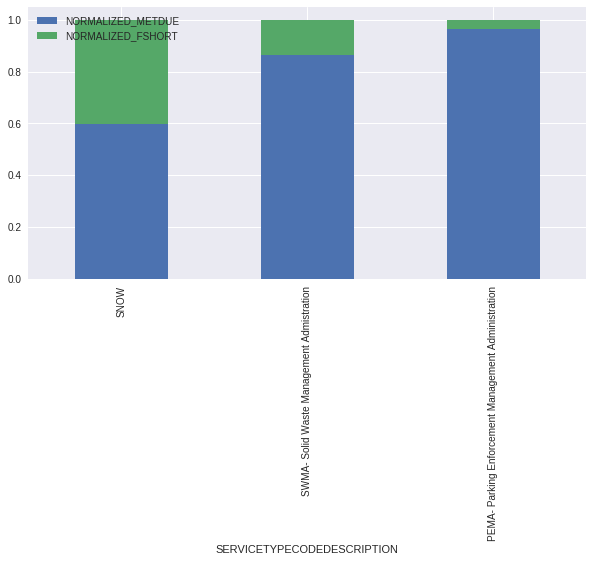

In [0]:
    df['_AUX'] = df["SERVICEDUEDATE"]- df['RESOLUTIONDATE']

    df2 = df[
        (df["STATUS_CODE"] == "CLOSED")
        &
        (df["ORGANIZATIONACRONYM"] == "DPW")
    ].sort_values(by="_AUX",ascending=True)[['SERVICETYPECODEDESCRIPTION',"_AUX"]]

    display(df2.head(10))

    df2["_AUX"] = (df2["_AUX"])/pd.Timedelta(days=1)


    myGroups = np.where(df2['_AUX'] > 0. , 'MetDueDate', 'fallShort')
    display(myGroups)

    display(df2.head(5).sort_values(by="_AUX",ascending=True))

    df2["_AUX"] = abs(df2["_AUX"])
    t1 = df2.groupby(["SERVICETYPECODEDESCRIPTION",myGroups])['_AUX'].count()
    display(t1)


    t1 = t1.unstack()

    t1["NORMALIZED_METDUE"] = t1["MetDueDate"] / (t1["MetDueDate"] + t1["fallShort"])
    t1["NORMALIZED_FSHORT"] = t1["fallShort"] / (t1["MetDueDate"] + t1["fallShort"])
    t1 = t1.dropna()
    display(t1)

    t1.sort_values(by="NORMALIZED_METDUE",ascending=True)[['NORMALIZED_METDUE','NORMALIZED_FSHORT']].plot(kind="bar",stacked=True,logy=False,figsize=[10,5])


,ADDDATE,_AUX,SERVICEDUEDATE,STATUS_CODE
652,2018-01-03 09:34:21,183 days 07:25:39,2018-07-05 17:00:00,OPEN
782,2018-01-02 21:32:00,183 days 18:28:00,2018-07-05 16:00:00,OPEN
863,2018-01-02 17:58:30,183 days 22:01:30,2018-07-05 16:00:00,OPEN
859,2018-01-02 19:35:53,183 days 20:24:07,2018-07-05 16:00:00,OPEN
680,2018-01-02 14:55:46,183 days 22:59:14,2018-07-05 13:55:00,OPEN
486,2018-01-02 13:49:04,183 days 22:59:56,2018-07-05 12:49:00,OPEN
491,2018-01-02 13:32:07,183 days 22:59:53,2018-07-05 12:32:00,OPEN
471,2018-01-02 13:27:59,183 days 22:59:01,2018-07-05 12:27:00,OPEN
460,2018-01-02 13:23:15,183 days 22:59:45,2018-07-05 12:23:00,OPEN
43,2018-01-01 13:14:20,183 days 02:45:40,2018-07-03 16:00:00,OPEN


181369    185.375231
181320    185.409653
181235    185.834248
180975    185.785255
180967    185.830613
Name: _AUX, dtype: float64

SHSAPE (5239,)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

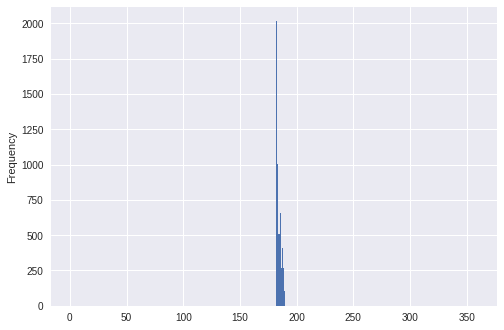

In [0]:
df['_AUX'] = df["SERVICEDUEDATE"]- df['ADDDATE']
df2 = df[
    (df['SERVICECODEDESCRIPTION'] == 'Roadway Signs' )
    &
    (df['STATUS_CODE'] == 'OPEN' )
    & 
    (df["SERVICEDUEDATE"] < pd.to_datetime('2019-01-19', format='%Y-%m-%d'))
].sort_values(by="SERVICEDUEDATE",ascending=False)[['ADDDATE',"_AUX","SERVICEDUEDATE","STATUS_CODE",]]

display(df2.tail(10))

df2 = (df2["_AUX"])/pd.Timedelta(days=1)
display(df2.head(5))
print("SHSAPE", df2.shape)
bins=[i for i in range(1,360)]
print(bins)
df2.plot(kind='hist',logy=False,bins = bins)



,ADDDATE,ADDDATE_AUX,STATUS_CODE
43,2018-01-01 13:14:20,0 days 13:14:20,OPEN
460,2018-01-02 13:23:15,1 days 13:23:15,OPEN
471,2018-01-02 13:27:59,1 days 13:27:59,OPEN
491,2018-01-02 13:32:07,1 days 13:32:07,OPEN
486,2018-01-02 13:49:04,1 days 13:49:04,OPEN


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


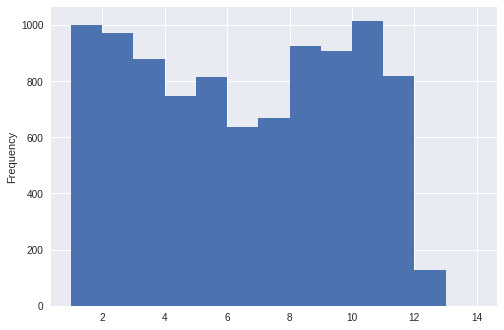

In [0]:
df['ADDDATE_AUX'] = df['ADDDATE'] - pd.to_datetime('2018-01-01', format='%Y-%m-%d')
df2 = df[
    (df['SERVICECODEDESCRIPTION'] == 'Roadway Signs' )
    &
    (df['STATUS_CODE'] == 'OPEN' )
].sort_values(by="ADDDATE")[['ADDDATE','ADDDATE_AUX',"STATUS_CODE"]]

display(df2.head())

df2 = (df2["ADDDATE_AUX"])/pd.Timedelta(days=30)
df2.head()
bins=[i for i in range(1,15)]
print(bins)
df2.plot(kind='hist',logy=False,bins = bins)



STATUS_CODE,CLOSED,OPEN
SERVICECODEDESCRIPTION,,
Alley Repair,56.0,870.0
Bicycle Services,92.0,282.0
Bus/Rail Issues,132.0,120.0
Parking Meter Repair,26751.0,14027.0
Pothole,8230.0,2639.0
Resident Parking Permit,1.0,123.0
Roadway Repair,54.0,1846.0
Roadway Signs,1595.0,9923.0
Roadway Striping / Markings,155.0,717.0


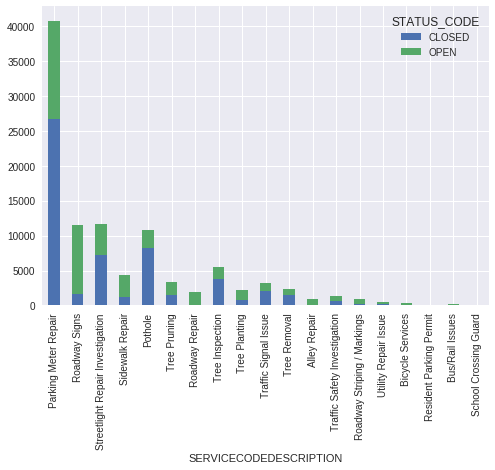

In [0]:
df2 = df[df["ORGANIZATIONACRONYM"] == "DDOT"].groupby(by=["SERVICECODEDESCRIPTION","STATUS_CODE"])["SERVICECODEDESCRIPTION"].count()

df2 = df2.unstack('STATUS_CODE').dropna()

display(df2)
df2.sort_values(by='OPEN',ascending=False).plot(kind="bar",stacked=True)


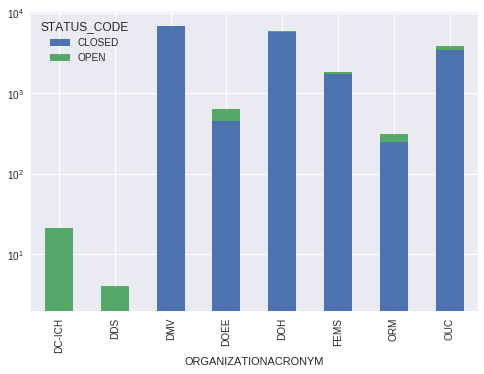

In [0]:
df2 = df[
    (df["ORGANIZATIONACRONYM"] != "DPW") 
    & 
    (df["ORGANIZATIONACRONYM"] != "DDOT")
].groupby(by=["ORGANIZATIONACRONYM","STATUS_CODE"])["ORGANIZATIONACRONYM"].count().unstack('STATUS_CODE')

df2.plot(kind="bar",stacked=True,logy=True)
plt.show()

In [0]:
df[(df["ORGANIZATIONACRONYM"] != "DPW") & (df["ORGANIZATIONACRONYM"] != "DDOT")].groupby(by=["ORGANIZATIONACRONYM","STATUS_CODE"])["ORGANIZATIONACRONYM"].count().sort_values(ascending=False)

ORGANIZATIONACRONYM  STATUS_CODE
DMV                  CLOSED         6882
DOH                  CLOSED         5811
OUC                  CLOSED         3484
FEMS                 CLOSED         1723
DOEE                 CLOSED          460
OUC                  OPEN            340
ORM                  CLOSED          246
DOEE                 OPEN            183
DOH                  OPEN            136
FEMS                 OPEN            105
ORM                  OPEN             69
DC-ICH               OPEN             19
DMV                  OPEN              4
DDS                  OPEN              4
DC-ICH               CLOSED            2
Name: ORGANIZATIONACRONYM, dtype: int64

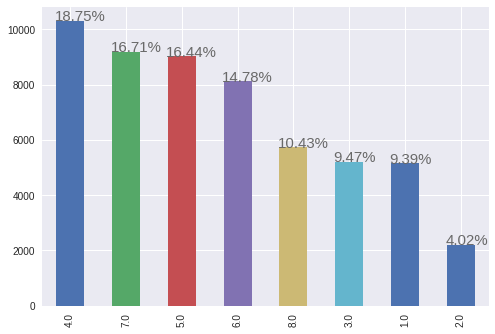

In [0]:
ax = df[
    df["SERVICECODEDESCRIPTION"] == "Bulk Collection"
]["WARD"].value_counts().plot(kind="bar")

ax.set_alpha(0.8)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

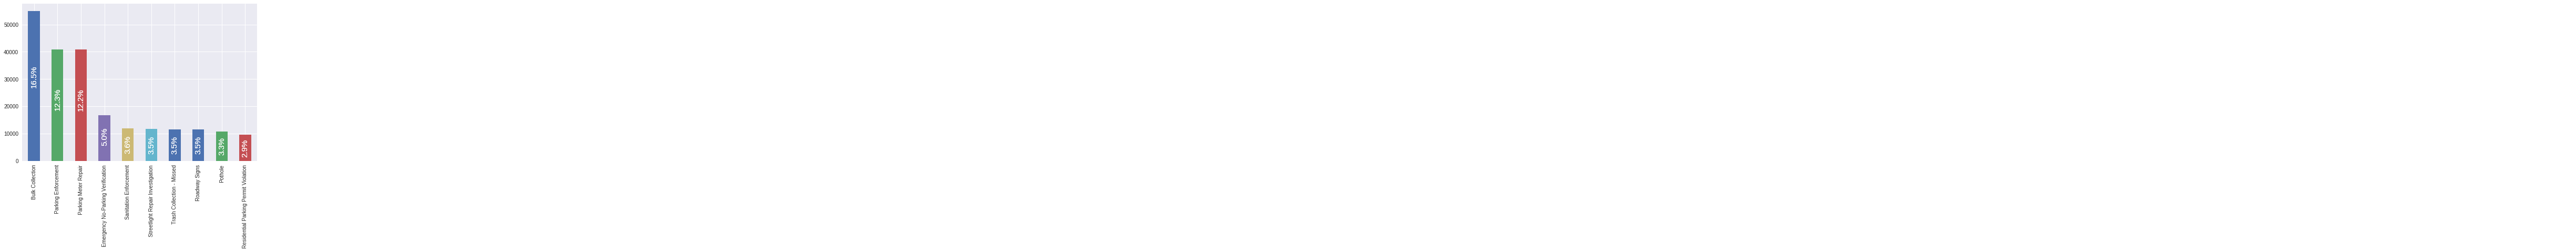

In [0]:
axAll = df["SERVICECODEDESCRIPTION"].value_counts().sort_values(ascending=False).plot(kind="bar")

totals = []
for i in axAll.patches:
    totals.append(i.get_height())
total = sum(totals)

del axAll

axTop = df["SERVICECODEDESCRIPTION"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")

axTop.set_alpha(0.8)

for i in axTop.patches:
    axTop.text(i.get_x()+0.1, 0.6*i.get_height(), \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=15,
                color='white',rotation=90)
    
plt.show()

In [0]:
print("First request",df["SERVICEORDERDATE"].min())
print("Last request",df["SERVICEORDERDATE"].max())
print("Last RESOLUTIONDATE",df["RESOLUTIONDATE"].max())
print("First RESOLUTIONDATE",df["RESOLUTIONDATE"].min())

First request 2018-01-01 00:05:35
Last request 2018-12-31 23:32:09
Last RESOLUTIONDATE 2019-01-09 15:01:37
Min RESOLUTIONDATE 2018-01-01 00:19:26


In [0]:
df.sort_values(by="ADDDATE",ascending=False)[["ADDDATE","SERVICEORDERDATE","ZIPCODE","RESOLUTIONDATE","SERVICECODEDESCRIPTION","STATUS_CODE"]].head(2)

,ADDDATE,SERVICEORDERDATE,ZIPCODE,RESOLUTIONDATE,SERVICECODEDESCRIPTION,STATUS_CODE
332503,2018-12-31 23:32:09,2018-12-31 23:32:09,20002.0,2019-01-01 05:58:00,Parking Enforcement,CLOSED
332390,2018-12-31 22:39:16,2018-12-31 22:39:16,20001.0,2019-01-01 05:57:18,Parking Enforcement,CLOSED


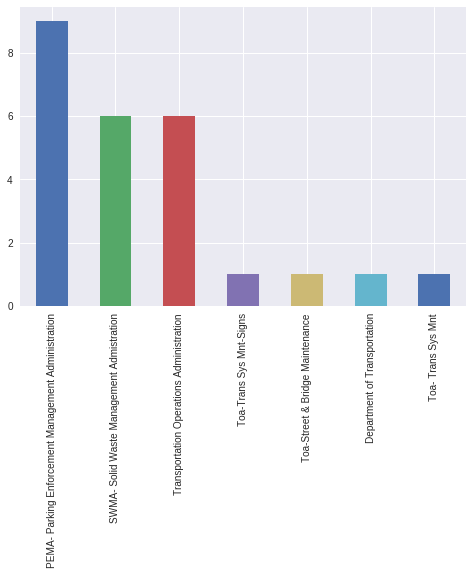

In [0]:
df[df["ZIPCODE"] == 20064.0]["SERVICETYPECODEDESCRIPTION"].value_counts().plot(kind="bar")

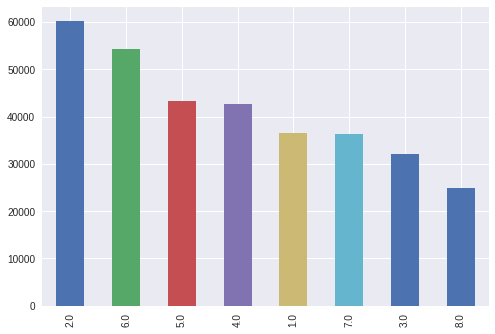

In [0]:
df["WARD"].value_counts().plot(kind="bar")

DPW +++++++++++++++++++++++


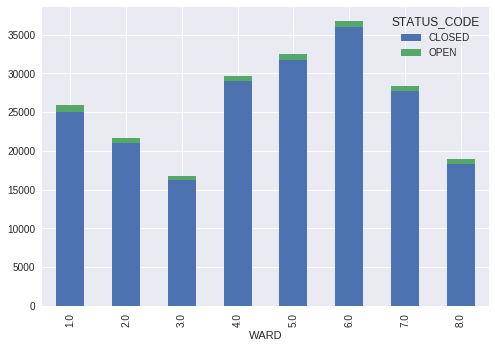

DDOT +++++++++++++++++++++++


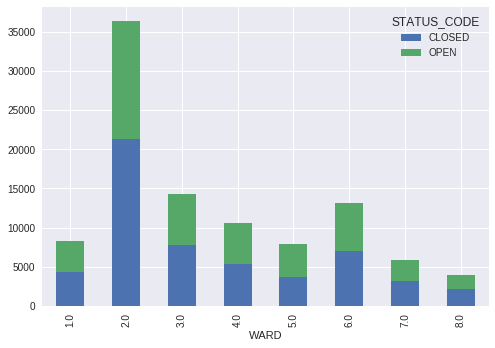

FEMS +++++++++++++++++++++++


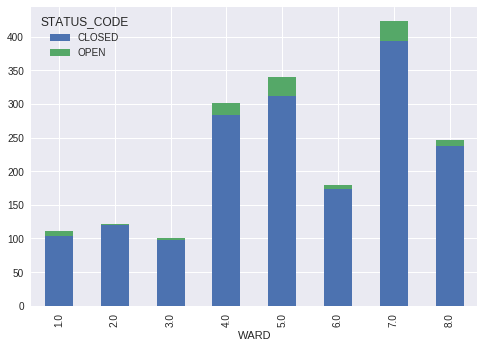

DOH +++++++++++++++++++++++


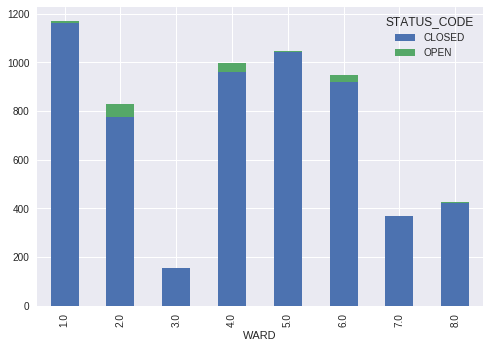

OUC +++++++++++++++++++++++


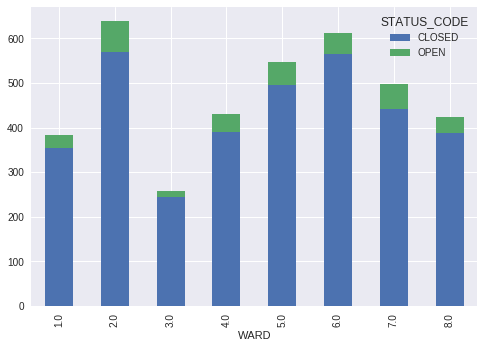

DOEE +++++++++++++++++++++++


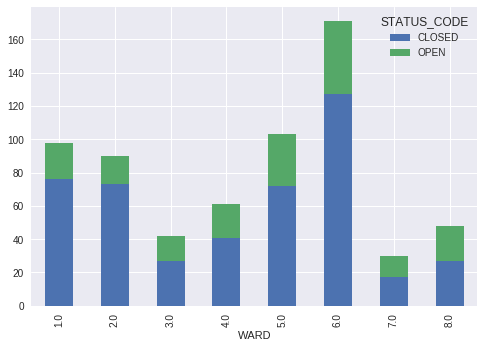

DMV +++++++++++++++++++++++


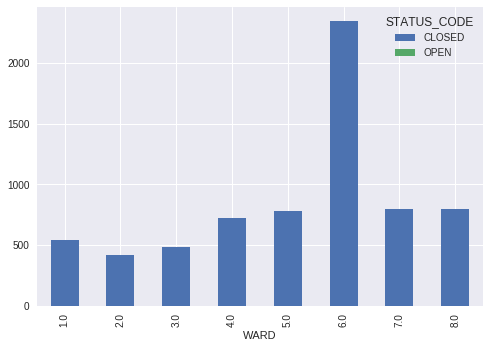

ORM +++++++++++++++++++++++


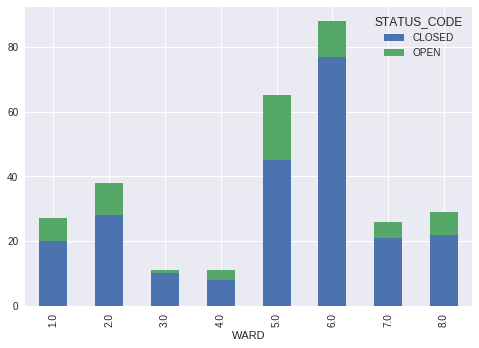

DC-ICH +++++++++++++++++++++++


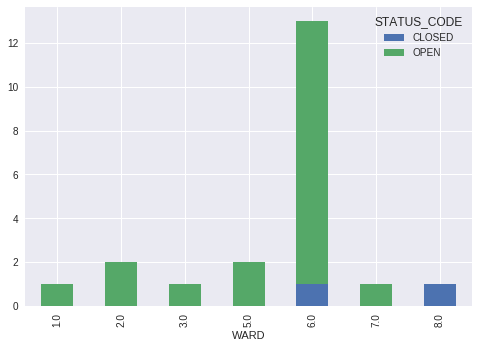

DDS +++++++++++++++++++++++


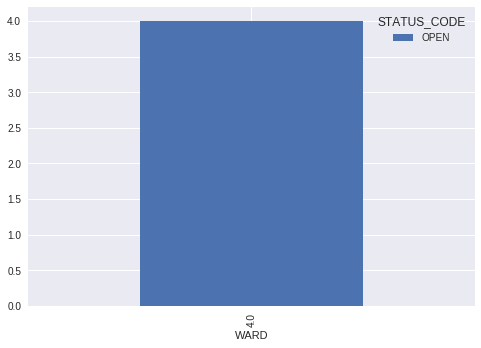

In [0]:
for org in df["ORGANIZATIONACRONYM"].dropna().unique():
    print(org,"+++++++++++++++++++++++")
    df2 = df[df["ORGANIZATIONACRONYM"] == org].groupby(by=["WARD","STATUS_CODE"])['WARD'].count().unstack('STATUS_CODE')
    df2.plot(kind="bar",stacked=True)
    plt.show()

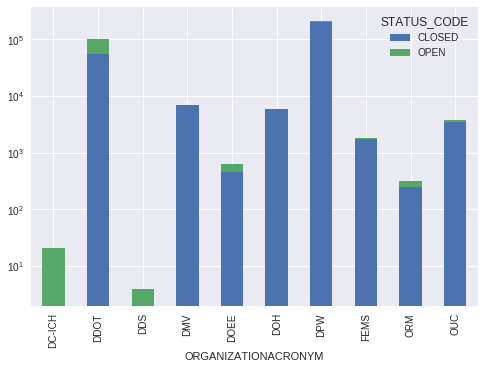

In [0]:
df2 = df.groupby(by=["ORGANIZATIONACRONYM","STATUS_CODE"])['ORGANIZATIONACRONYM'].count().unstack('STATUS_CODE')
df2.plot(kind="bar",stacked=True,logy=True)

In [0]:
import math

ldf = df[["WARD","PRIORITY"]].dropna()

def getCounts(ward,priority):

    return len(ldf[
        (ldf["WARD"] == ward )
        &
        (ldf["PRIORITY"] == priority)
        &
        (ldf["PRIORITY"] != "STANDARD")
        
    ].index)

hvList = []

for ward in set(ldf["WARD"]):
    for p in ldf["PRIORITY"].unique():
        elem = ["Ward"+str(int(ward)),
               p,getCounts(ward,p)]
        hvList.append(elem)

print(hvList)


[['Ward1', 'STANDARD', 0], ['Ward1', 'URGENT', 2], ['Ward1', 'EMERGENCY', 0], ['Ward2', 'STANDARD', 0], ['Ward2', 'URGENT', 5], ['Ward2', 'EMERGENCY', 0], ['Ward3', 'STANDARD', 0], ['Ward3', 'URGENT', 6], ['Ward3', 'EMERGENCY', 0], ['Ward4', 'STANDARD', 0], ['Ward4', 'URGENT', 3], ['Ward4', 'EMERGENCY', 0], ['Ward5', 'STANDARD', 0], ['Ward5', 'URGENT', 3], ['Ward5', 'EMERGENCY', 1], ['Ward6', 'STANDARD', 0], ['Ward6', 'URGENT', 9], ['Ward6', 'EMERGENCY', 0], ['Ward7', 'STANDARD', 0], ['Ward7', 'URGENT', 2], ['Ward7', 'EMERGENCY', 0], ['Ward8', 'STANDARD', 0], ['Ward8', 'URGENT', 2], ['Ward8', 'EMERGENCY', 0]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


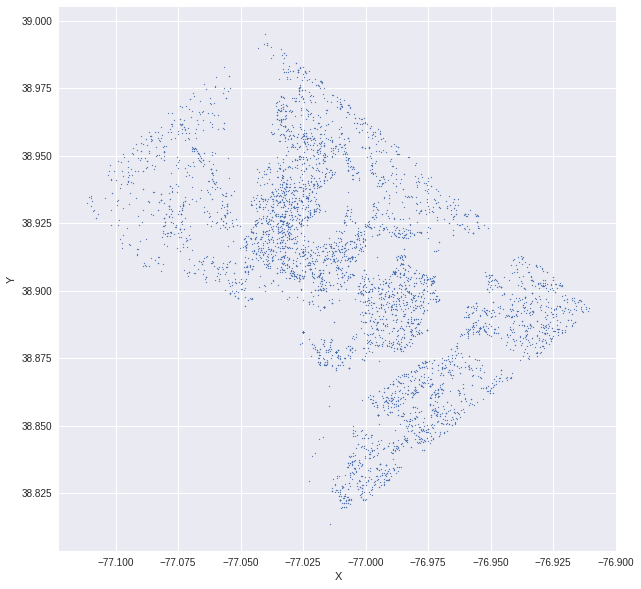

In [0]:
df[
    df['ORGANIZATIONACRONYM'] == 'DMV'
].plot(x='X',y='Y',kind="scatter",figsize=(10,10),s=1)

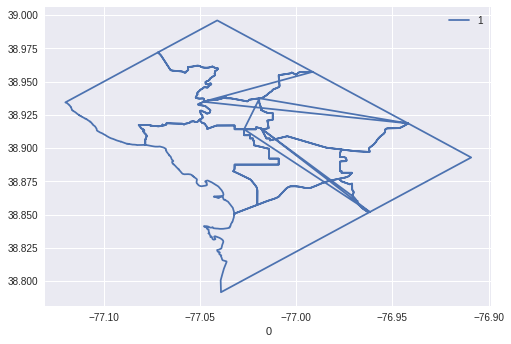

In [0]:

import requests
import json

WARD_MAP = "https://raw.githubusercontent.com/benbalter/dc-maps/master/maps/ward-2012.geojson"

r = requests.get(WARD_MAP)
wardMap = json.loads(r.text)
wardsMap = pd.DataFrame()

for ward in wardMap["features"]:
    wardMap = ward["geometry"]["coordinates"][0]
    wardMap = pd.DataFrame(wardMap)
    wardsMap = wardsMap.append(wardMap)
    
    #display(wardMap.head())
wardsMap.plot(x=0,y=1, kind="line")


,0,1
0,-77.119795,38.934351
1,-77.119795,38.934351
2,-77.040966,38.995968
3,-76.909150,38.892931
4,-77.039023,38.791644


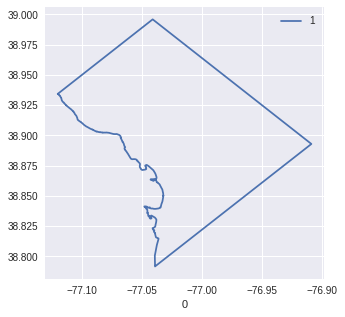

In [0]:
DC_MAP = "https://raw.githubusercontent.com/benbalter/dc-maps/master/maps/dc-boundary.geojson"

r = requests.get(DC_MAP)
dcMap = json.loads(r.text)
dcMap = dcMap["features"][0]["geometry"]["coordinates"]
dcMap = dcMap[0] 
dcMap = pd.DataFrame(dcMap)
display(dcMap.head())

ax = dcMap.plot(x=0,y=1,kind="line",figsize=(5,5))



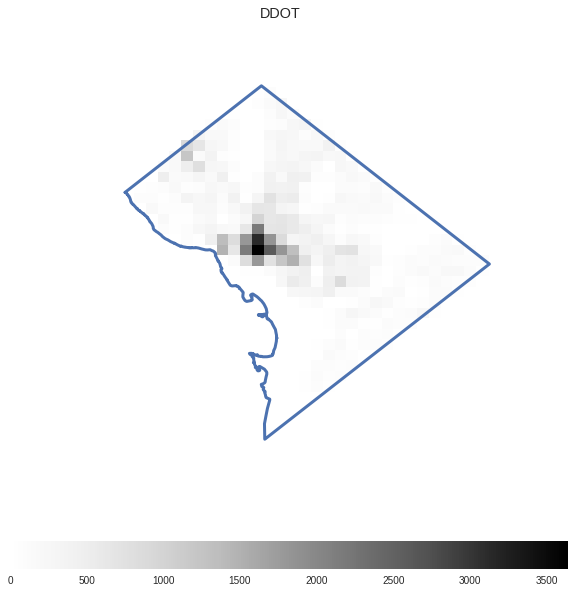

In [0]:

def plotMap(field = 'ORGANIZATIONACRONYM', eqto = "DMV"):
    
    fig, ax1 = plt.subplots()
    fig.suptitle(eqto)
    fig.set_size_inches(10,10)
    ax1.set_aspect("equal")
    ax1.set_facecolor("W")
    pl1 = ax1.plot(dcMap[0],dcMap[1],linestyle="-",linewidth=3)

    dmv = df[
        df[field] == eqto
    ]

    hist, xbins, ybins, im  = ax1.hist2d(dmv['X'],dmv['Y'],bins=30)
    ax1.set_ylim(38.78,39)
    ax1.set_xlim(-77.15,-76.9)
    fig.colorbar(im,ax=ax1,orientation="horizontal")
    plt.axis('off')
    plt.show()
    
plotMap('ORGANIZATIONACRONYM',"DDOT")

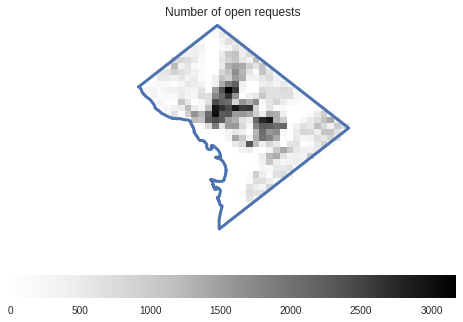

In [0]:
fig, ax1 = plt.subplots()
ax1.set_aspect("equal")
ax1.set_facecolor("W")
pl1 = ax1.plot(dcMap[0],dcMap[1],linestyle="-",linewidth=3)

df2 = df[(df["STATUS_CODE"] == "CLOSED")]

hist, xbins, ybins, im  = ax1.hist2d(df2['X'],df2['Y'],bins=30)

ax1.set_ylim(38.79,39)
ax1.set_xlim(-77.15,-76.9)

#https://stackoverflow.com/questions/42387471/how-to-add-a-colorbar-for-a-hist2d-plot

fig.colorbar(im,ax=ax1,orientation="horizontal")
plt.axis('off')
plt.title("Number of open requests")
plt.show()


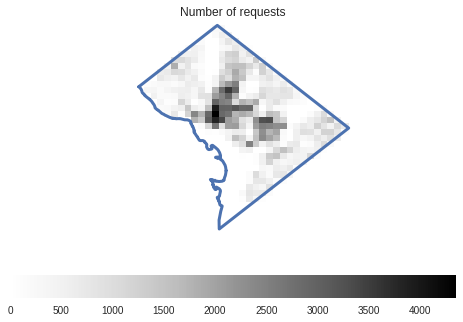

In [0]:
fig, ax1 = plt.subplots()
ax1.set_aspect("equal")
ax1.set_facecolor("W")
pl1 = ax1.plot(dcMap[0],dcMap[1],linestyle="-",linewidth=3)

hist, xbins, ybins, im  = ax1.hist2d(df['X'],df['Y'],bins=30)

ax1.set_ylim(38.79,39)
ax1.set_xlim(-77.15,-76.9)

#https://stackoverflow.com/questions/42387471/how-to-add-a-colorbar-for-a-hist2d-plot

fig.colorbar(im,ax=ax1,orientation="horizontal")
plt.axis('off')
plt.title("Number of requests")
plt.show()


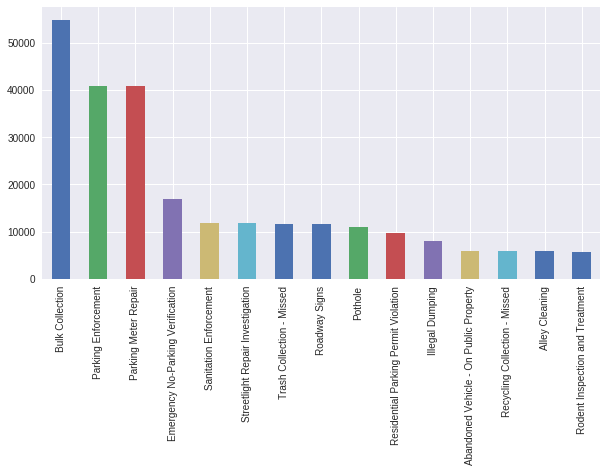

In [0]:
tmp1 = df['SERVICECODEDESCRIPTION'].value_counts()
tmp1 = tmp1.sort_values(ascending=False)
tmp1.head(15).plot(kind="bar",figsize=[10,5],logy=False)


Text(0, 0.5, 'Number of cases handled')

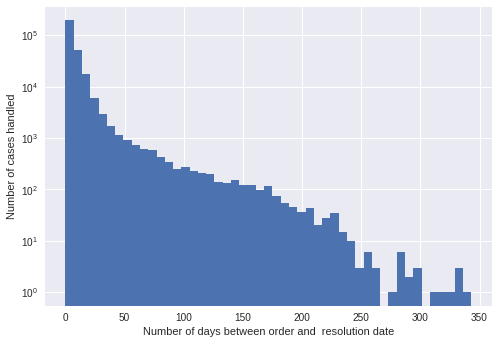

In [0]:
df['HOWLONG'] = df['RESOLUTIONDATE'] - df['ADDDATE']
df['HOWLONG'].head()
(df['HOWLONG'].dropna() / pd.Timedelta(days=1)).plot(
    kind='hist',
    bins = [i*7 for i in range(50)],
    logy=True)
plt.xlabel('Number of days between order and  resolution date')
plt.ylabel('Number of cases handled')

In [0]:
df['HOWLONGDUE'] = df['SERVICEDUEDATE'] - df['ADDDATE']
df[
    df['ORGANIZATIONACRONYM'] == 'DMV'
][['ADDDATE','RESOLUTIONDATE','HOWLONG','HOWLONGDUE']].dropna().tail(10)

,ADDDATE,RESOLUTIONDATE,HOWLONG,HOWLONGDUE
332341,2018-12-31 15:53:20,2019-01-04 14:24:43,3 days 22:31:23,7 days 23:59:40
332656,2018-12-31 10:15:07,2019-01-04 09:44:40,3 days 23:29:33,3 days 23:59:53
332673,2018-12-31 10:25:03,2019-01-04 09:42:07,3 days 23:17:04,3 days 23:59:57
332811,2018-12-31 13:16:29,2019-01-02 16:55:08,2 days 03:38:39,3 days 23:59:31
332950,2018-12-31 09:33:17,2019-01-08 07:54:25,7 days 22:21:08,7 days 23:59:43
332962,2018-12-31 09:37:22,2019-01-04 08:57:59,3 days 23:20:37,3 days 23:59:38
332976,2018-12-31 10:21:33,2019-01-04 08:57:10,3 days 22:35:37,3 days 23:59:27
333002,2018-12-31 11:09:36,2019-01-08 09:00:14,7 days 21:50:38,7 days 23:59:24
333017,2018-12-31 11:30:01,2019-01-08 10:58:23,7 days 23:28:22,7 days 23:59:59
333081,2018-12-31 13:13:00,2019-01-08 09:14:07,7 days 20:01:07,8 days 00:00:00


Text(0, 0.5, 'Number of requests handled')

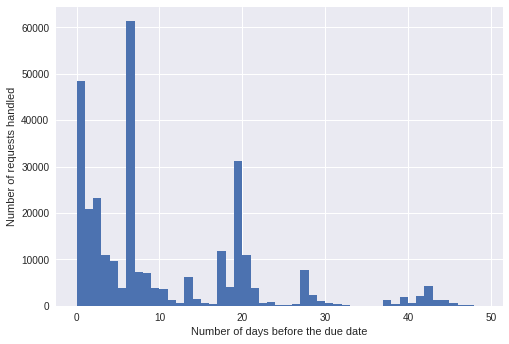

In [0]:
(df["HOWLONGDUE"].dropna()/pd.Timedelta(days=1)).plot(
    kind="hist", 
    bins=[i*1 for i in range(50)])
plt.xlabel("Number of days before the due date")
plt.ylabel("Number of requests handled")

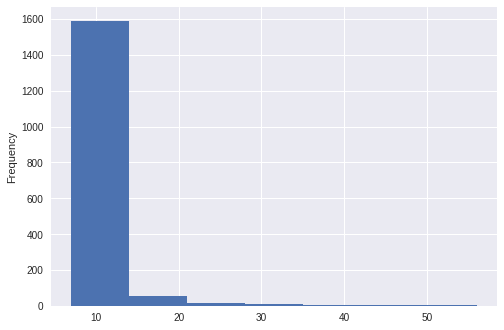

In [0]:
(df[
    df['ORGANIZATIONACRONYM'] == 'DMV'
]['HOWLONG']/pd.Timedelta(days=1)).plot(kind='hist',logy=False,bins=[i*7 for i in range(1,9)])

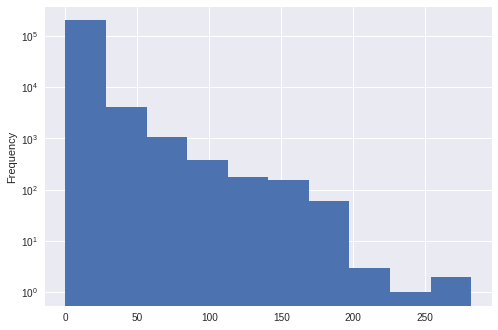

In [0]:
(df[
    df['ORGANIZATIONACRONYM'] == 'DPW'
]['HOWLONG']/pd.Timedelta(days=1)).plot(kind='hist',logy=True)

DPW


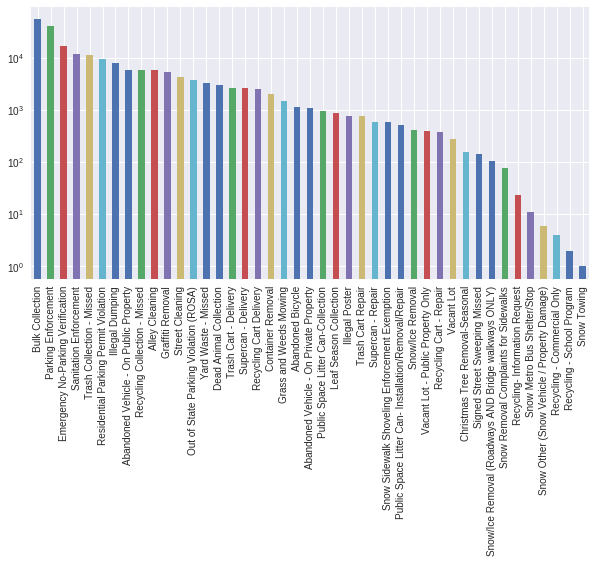

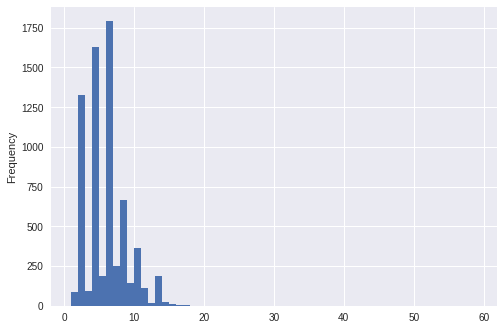

DDOT


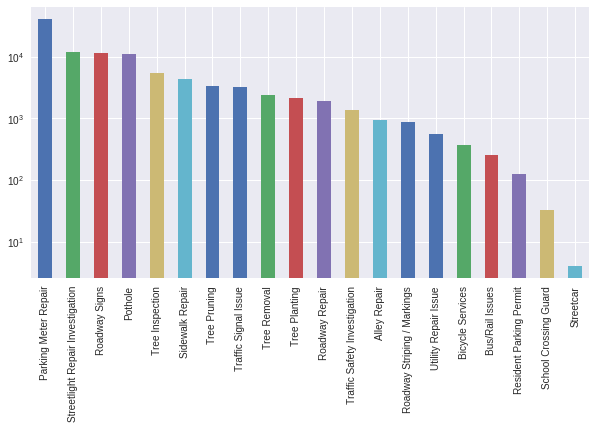

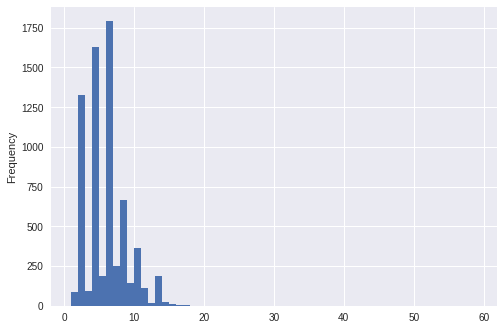

FEMS


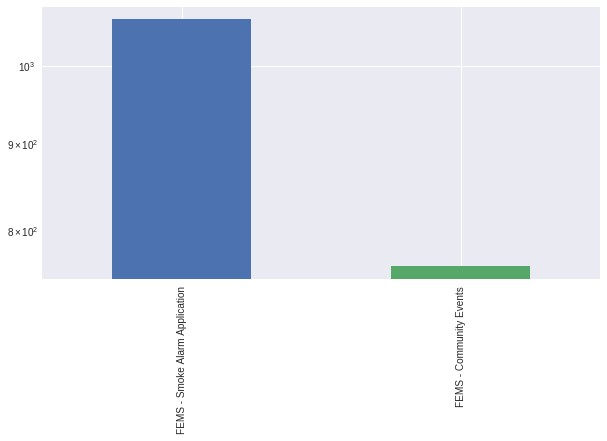

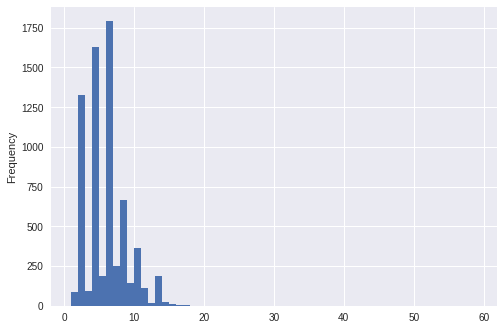

DOH


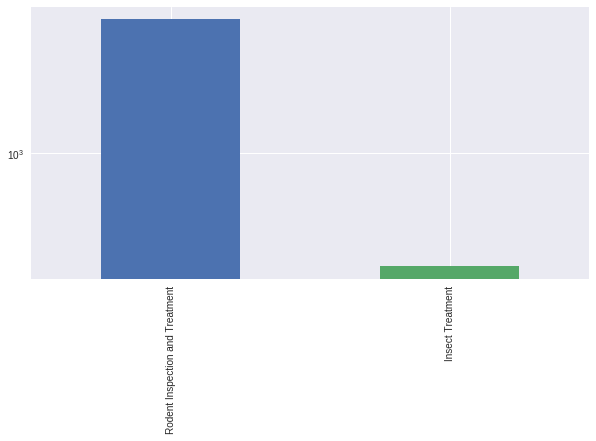

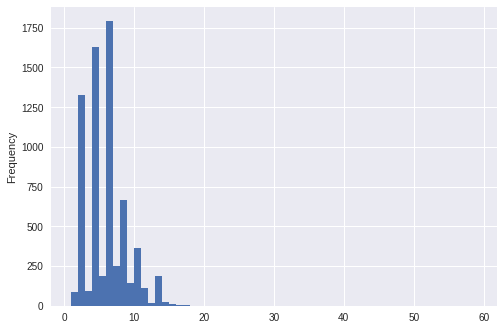

OUC


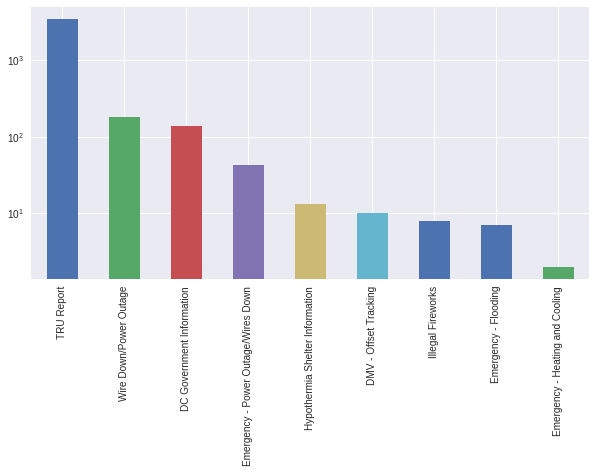

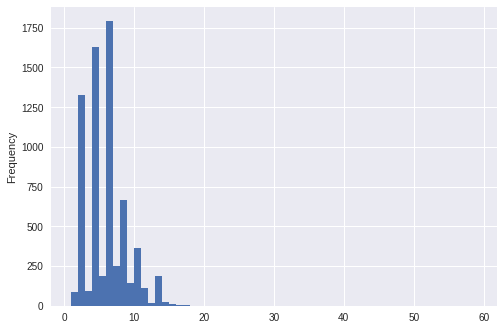

DOEE


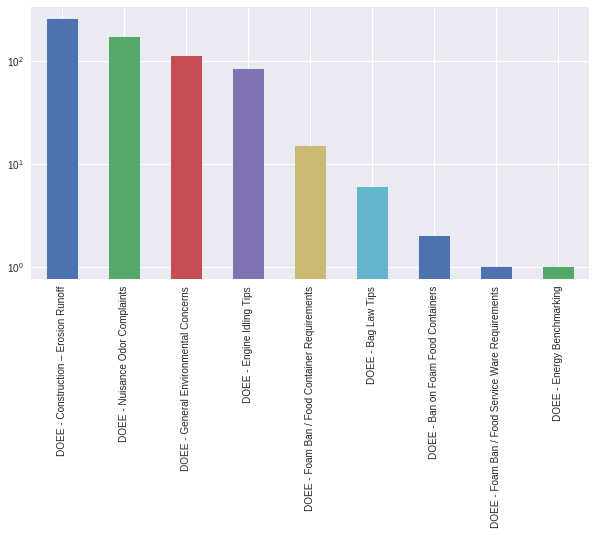

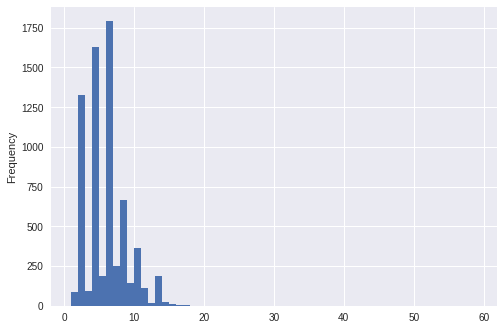

DMV


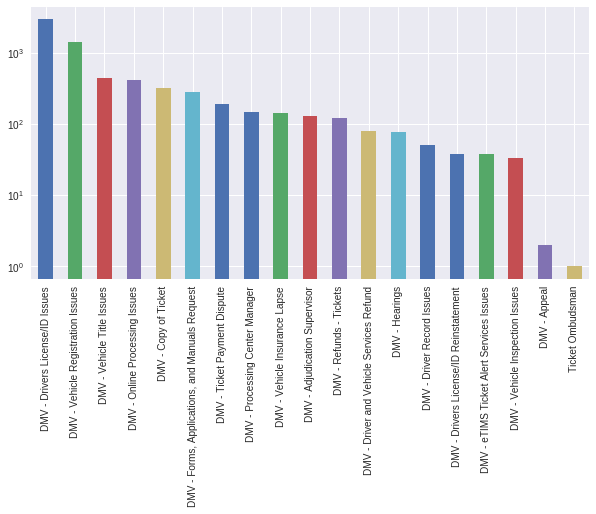

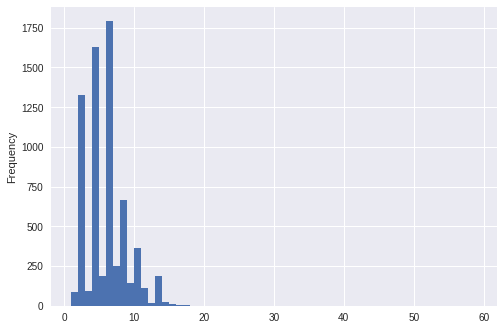

ORM


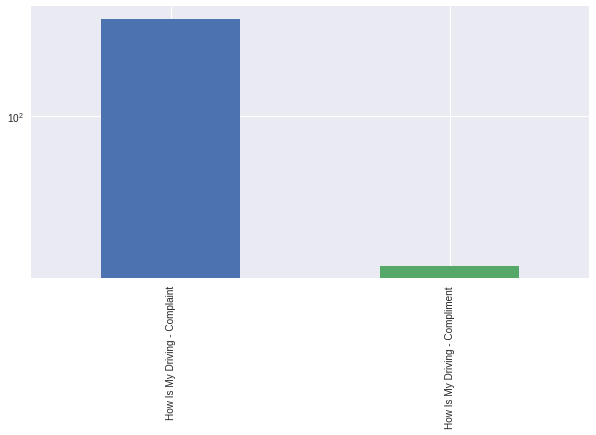

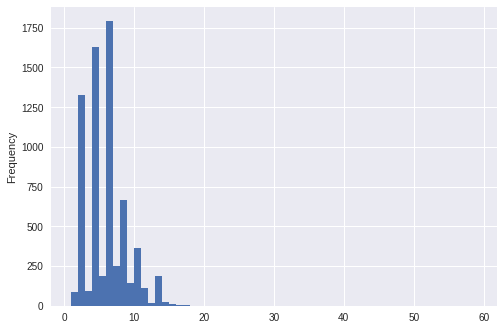

DC-ICH


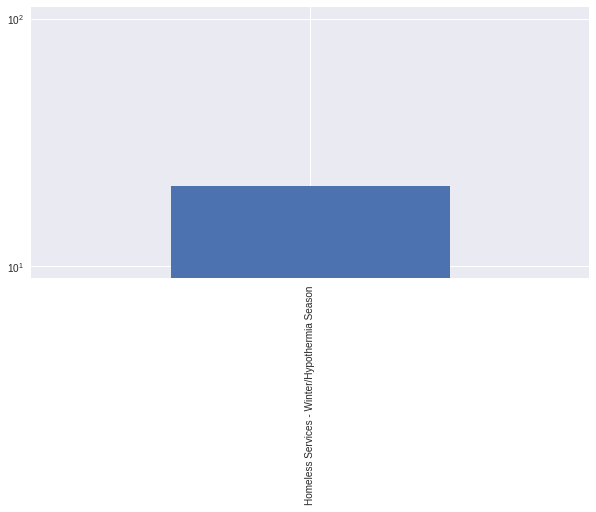

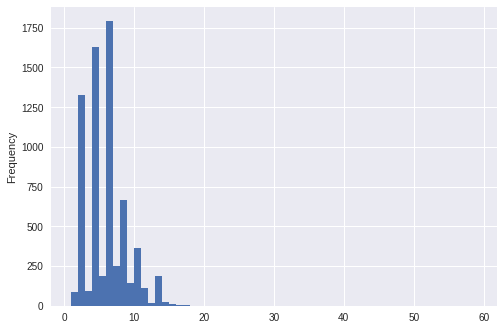

DDS


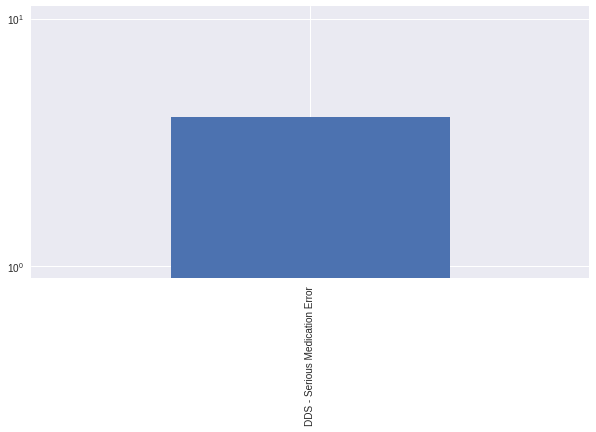

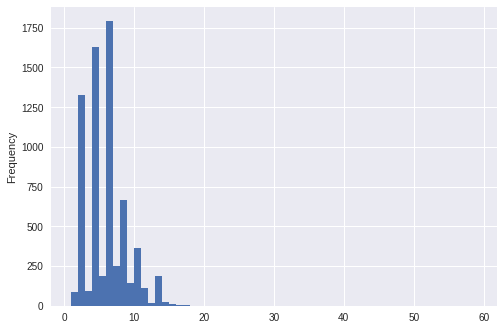

In [0]:

for acronym in df["ORGANIZATIONACRONYM"].dropna().unique():
    print(acronym)
    if isinstance(acronym,str):
        df[
            df['ORGANIZATIONACRONYM'] == str(acronym)
        ]["SERVICECODEDESCRIPTION"].value_counts().plot(kind="bar",figsize=[10,5],logy=True,rot=90)
        plt.show()
        (df[df['ORGANIZATIONACRONYM'] == 'DMV']['HOWLONGDUE']/pd.Timedelta(days=1)).plot(kind='hist',logy=False,bins=[i for i in range(1,60)])
        plt.show()

In [0]:

for acronym in set(df['ORGANIZATIONACRONYM']):
    if isinstance(acronym,str):
        print(acronym,"Minimum:",df[df['ORGANIZATIONACRONYM'] == str(acronym)]['HOWLONG'].min())
        print(acronym,"Maximum:",df[df['ORGANIZATIONACRONYM'] == str(acronym)]['HOWLONG'].max())
    

DDS Minimum: nan
DDS Maximum: NaT
DOH Minimum: 0 days 00:00:40
DOH Maximum: 226 days 18:34:57
DDOT Minimum: 0 days 00:00:00
DDOT Maximum: 364 days 21:55:50
DMV Minimum: 0 days 00:00:57
DMV Maximum: 146 days 22:37:09
FEMS Minimum: 0 days 00:06:32
FEMS Maximum: 333 days 11:13:13
DPW Minimum: 0 days 00:00:00
DPW Maximum: 282 days 01:18:43
DC-ICH Minimum: 0 days 00:03:41
DC-ICH Maximum: 39 days 09:00:10
DOEE Minimum: 0 days 00:01:11
DOEE Maximum: 125 days 10:06:31
OUC Minimum: 0 days 00:00:00
OUC Maximum: 18 days 19:25:57
ORM Minimum: 0 days 00:05:08
ORM Maximum: 154 days 04:07:07


DPW
DDOT
FEMS
DOH
OUC
DOEE
DMV
ORM
DC-ICH
DDS
nan


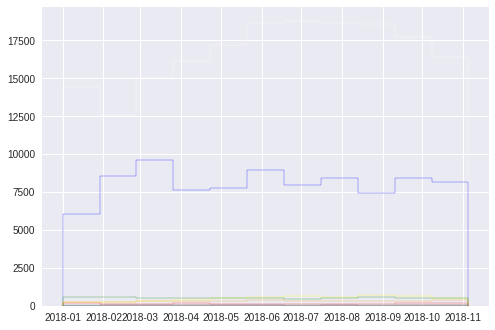

In [0]:
from datetime import timedelta,datetime

colors = {
    "DPW" : "white",
    "DDOT" : "blue",
    "FEMS" : "red",
    "DOH" : "yellow",
    "OUC" : "orange",
    "DOEE" : "gray",
    "DMV" : "green",
    "ORM" : "brown",
    "DC-ICH" : "cyan",
    "DDS" : "pink",
    "nan" : "black"
}

for i in df['ORGANIZATIONACRONYM'].unique():
    print(i)
    b = df[
        df['ORGANIZATIONACRONYM'] == i
    ]['ADDDATE']
    
    bins = mpl.dates.drange(datetime(2018,1,1),datetime(2018,12,1),timedelta(weeks=4))

    plt.hist(b,bins=bins, color=colors[str(i)],log=False,stacked=True,histtype= 'step')


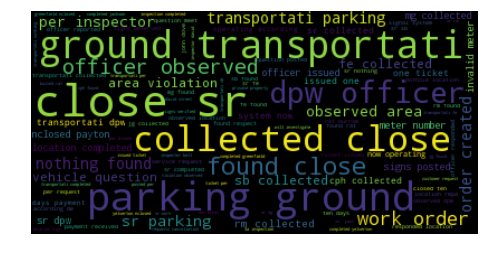

In [0]:
from wordcloud import WordCloud

text = df['DETAILS'].dropna().to_string().lower()
#DDOT%e2%80%99s
#'dpw officer'
for i in ['ddot','99s','e2']:
    text = text.replace(i,'')

wc = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
df['DETAILSSTR'] = df['DETAILS'].astype(str)

df[
    df['DETAILSSTR'].str.contains("ground")
]['DETAILSSTR'].head()

9189     Kaley%2c%0a%0aThanks for your request. Tree wa...
9283     Greetings%2c%0a%0aThanks for your request. Tre...
10840    Per Inspection %26 Investigation%3a Wasa is aw...
12604    Per Inspection %26 Investigation%3a Wasa is aw...
13530    Trees improve respiratory problems by reducing...
Name: DETAILSSTR, dtype: object